In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from pandas_datareader import data as wb

In [76]:
# assets=["PG","^GSPC"]
# data=pd.DataFrame()
# for a in assets:
#     data[a]=wb.DataReader(a,data_source='yahoo',start='2010-1-1',end='2017-3-20')['Adj Close']

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1816 entries, 2009-12-31 to 2017-03-20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      1816 non-null   float64
 1   ^GSPC   1816 non-null   float64
dtypes: float64(2)
memory usage: 42.6 KB


In [81]:
data=pd.read_csv('Data.csv',index_col='Date',parse_dates=True)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1819 entries, 2010-01-04 to 2017-03-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      1819 non-null   float64
 1   ^GSPC   1819 non-null   float64
dtypes: float64(2)
memory usage: 42.6 KB


In [83]:
data.head()

,PG,^GSPC
Date,,
2010-01-04,61.119999,1132.989990
2010-01-05,61.139999,1136.520020
2010-01-06,60.849998,1137.140015
2010-01-07,60.520000,1141.689941
2010-01-08,60.439999,1144.979980


<AxesSubplot:xlabel='Date'>

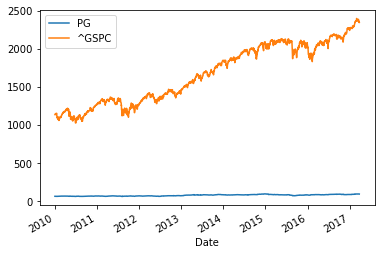

In [84]:
data.plot()

In [88]:
data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


<AxesSubplot:xlabel='Date'>

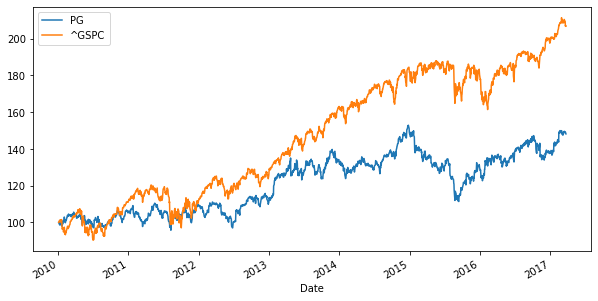

In [90]:
(data/data.iloc[0]*100).plot(figsize=(10,5))

In [7]:
returns=data/data.shift(1)

In [8]:
returns

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,1.000327,1.003116
2010-01-06,0.995257,1.000546
2010-01-07,0.994577,1.004001
2010-01-08,0.998678,1.002882
...,...,...
2017-03-20,1.002418,0.997990
2017-03-21,0.999671,0.987592
2017-03-22,0.997807,1.001890


In [91]:
log_returns=np.log(data/data.shift(1))

In [92]:
log_returns.mean()*250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [93]:
log_returns.cov()*250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [94]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [13]:
weights=np.random.random(2)

In [14]:
weights

array([0.34839179, 0.50795374])

In [15]:
norm_weights=weights/np.sum(weights)

In [18]:
norm_weights

array([0.40683553, 0.59316447])

### Expected Portfolio Return

In [33]:
total_porft_return=(log_returns.mean()*weights)*250

In [34]:
np.sum(total_porft_return)

0.06962242417009915

### Expected Portfolio Variance

In [35]:
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.012944166092231865

### Expected Portfolio Volatility

In [37]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.11377243116076875

# Try 1000 Combinations

In [95]:
portfolio_returns=[]
portfoilio_volatilities=[]
weights1=[]
weights2=[]
for i in range(1,1000):
    weights=np.random.random(2)
    norm_weights=weights/np.sum(weights)
    weights1.append(norm_weights[0])
    weights2.append(norm_weights[1])
    portfolio_returns.append(np.sum(norm_weights*log_returns.mean()*250))
    portfoilio_volatilities.append(np.sqrt(np.dot(norm_weights.T,np.dot(log_returns.cov()*250,norm_weights))))
    

In [96]:
portfolio_returns=np.array(portfolio_returns)
portfoilio_volatilities=np.array(portfoilio_volatilities)

In [97]:
df=pd.DataFrame({"Return":portfolio_returns,"Volatility":portfoilio_volatilities,"W1":weights1,"W2":weights2})

In [98]:
df

,Return,Volatility,W1,W2
0,0.085383,0.135550,0.317889,0.682111
1,0.079684,0.132089,0.442100,0.557900
2,0.072710,0.130796,0.594061,0.405939
3,0.080022,0.132236,0.434727,0.565273
4,0.082521,0.133551,0.380266,0.619734
...,...,...,...,...
994,0.082164,0.133338,0.388047,0.611953
995,0.087891,0.137718,0.263242,0.736758
996,0.091854,0.141889,0.176875,0.823125
997,0.074320,0.130800,0.558980,0.441020


Text(0, 0.5, 'Expected Return')

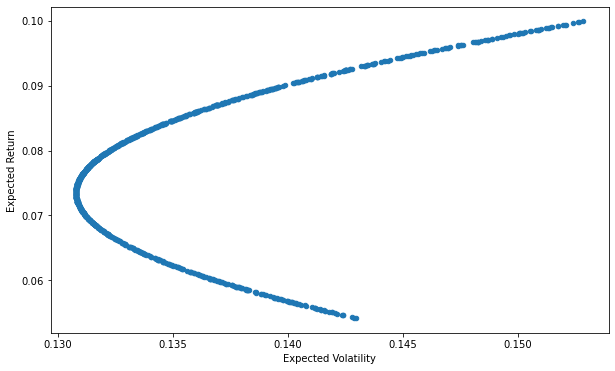

In [100]:
df.plot(x='Volatility',y="Return",kind='scatter',figsize=(10,6))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")

In [106]:
sharpe_ratio=portfolio_returns/portfoilio_volatilities

In [109]:
sharpe_ratio.argmax()

309

In [110]:
max_sr_vol=portfoilio_volatilities[309]
max_sr_ret=portfolio_returns[309]

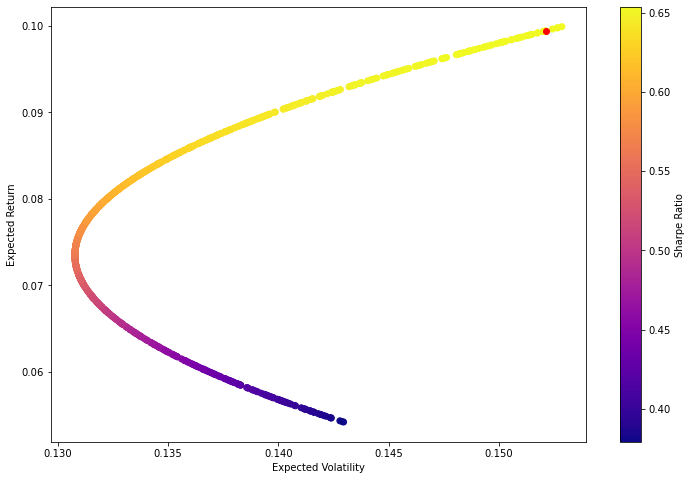

In [111]:
plt.figure(figsize=(12,8))
plt.scatter(portfoilio_volatilities,portfolio_returns,c=sharpe_ratio,cmap="plasma")
plt.colorbar(label='Sharpe Ratio')
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")

plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black')